<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/Feature_Scaling/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言

在資料科學領域中，資料前處理的過程，係訓練模型前提升資料品質的關鍵步驟。特徵縮放(Feature Scaling)是資料前處理的其中一種技巧，它能幫助我們更客觀理解與比較數據，避免因為多個特徵間不同的數值範圍尺度，造成我們解讀與判斷的偏差，另外，對於一些基於距離或梯度收斂的機器學習演算法，特徵縮放也能提升模型的訓練效率，與確保模型的預測。

# 特徵縮放的方法  

常見的特徵縮放方法如下 :  
- **標準化 Standardization**    
- **正規化 Normalization**   
- **穩健縮放 Robust Scaling**

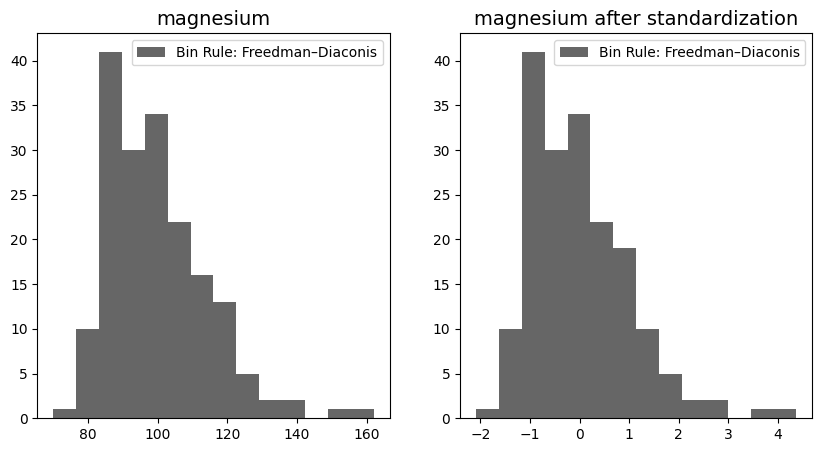

In [1]:
#@title <font color="#00dd00">**標準化 Standardization**</font>

#@markdown 標準化係將原始特徵轉換至平均數為 0 且標準差為 1，係一種基礎且常見的線性轉換方法。
#@markdown 若原始特徵的分布近似於常態，經標準化轉換後的特徵，其分布將近似於標準常態分布。
#@markdown </br>
#@markdown 標準化的轉換公式 :
#@markdown $$\displaystyle z = \frac{x-\mu}{\sigma}$$
#@markdown </br>
#@markdown 其中，$\mu$ 為特徵欄位的平均值，$\sigma$ 為特徵欄位的標準差。
#@markdown </br>
#@markdown 下圖係以紅酒資料集為例，對於 'magnesium'(鎂) 欄位進行標準化後，與原始分布的對比，
#@markdown 從下圖觀察可知，轉換前後的分布有略微不同。

import sys
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 下載紅酒資料集
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine['data'])
wine_df.columns = wine['feature_names']
wine_df['Classes']= wine['target']

# 'magnesium' 欄位
magnesium_ = wine_df['magnesium']
scaled_magnesium_ = StandardScaler().fit_transform(magnesium_ .values.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(x=magnesium_, bins='fd', fc='black', alpha=0.6, label='Bin Rule: Freedman–Diaconis')
plt.legend(loc='upper right')
plt.title('magnesium', fontsize=14)

plt.subplot(122)
plt.hist(x=scaled_magnesium_, bins='fd', fc='black', alpha=0.6, label='Bin Rule: Freedman–Diaconis')
plt.legend(loc='upper right')
plt.title('magnesium after standardization', fontsize=14)

img_path = os.path.join(os.getcwd(), 'Histogram_about_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

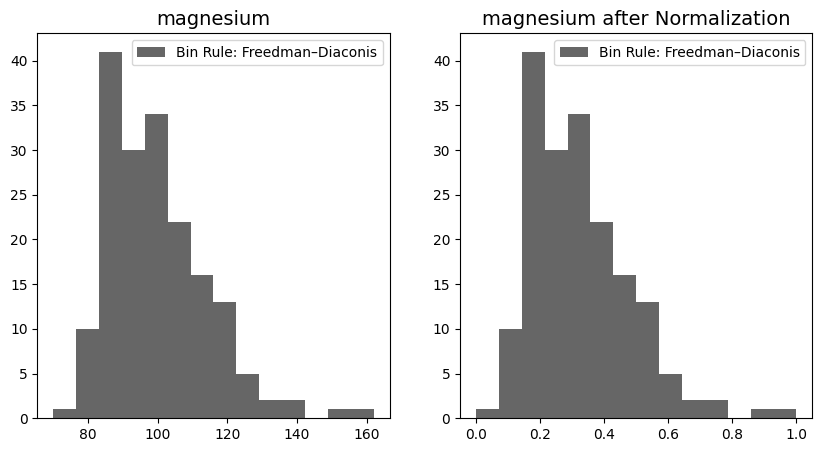

In [2]:
#@title <font color="#00dd00">**正規化 Normalization**</font>

#@markdown 正規化係將原始特徵縮放至 $[0, 1]$ 區間中，轉換後並不會改變原始特徵的分布。正規化不同於標準化的差異有二 :
#@markdown </br>
#@markdown - 經正規化轉換後的特徵，其平均值不為 0； </br>
#@markdown - 正規化較不易受到極端值影響。 </br>

#@markdown 正規化的轉換公式 :
#@markdown $$\displaystyle x^{\prime} = \frac{x-x_{\min}}{ x_{\max}-x_{\min} }$$
#@markdown </br>
#@markdown 其中，$x_{\min}$ 為特徵欄位的最小值，$x_{\max}$ 為特徵欄位的最大值。

#@markdown 下圖係以紅酒資料集為例，對於 'magnesium'(鎂) 欄位進行正規化後，與原始分布的對比，
#@markdown 從下圖的觀察可知，轉換前後的分布相同。

# 正規化 'magnesium' 欄位
mm_scaled_magnesium_ = MinMaxScaler().fit_transform(magnesium_.values.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(x=magnesium_, bins='fd', fc='black', alpha=0.6, label='Bin Rule: Freedman–Diaconis')
plt.legend(loc='upper right')
plt.title('magnesium', fontsize=14)

plt.subplot(122)
plt.hist(x=mm_scaled_magnesium_, bins='fd', fc='black', alpha=0.6, label='Bin Rule: Freedman–Diaconis')
plt.legend(loc='upper right')
plt.title('magnesium after Normalization', fontsize=14)

img_path = os.path.join(os.getcwd(), 'Histogram_about_Normalization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

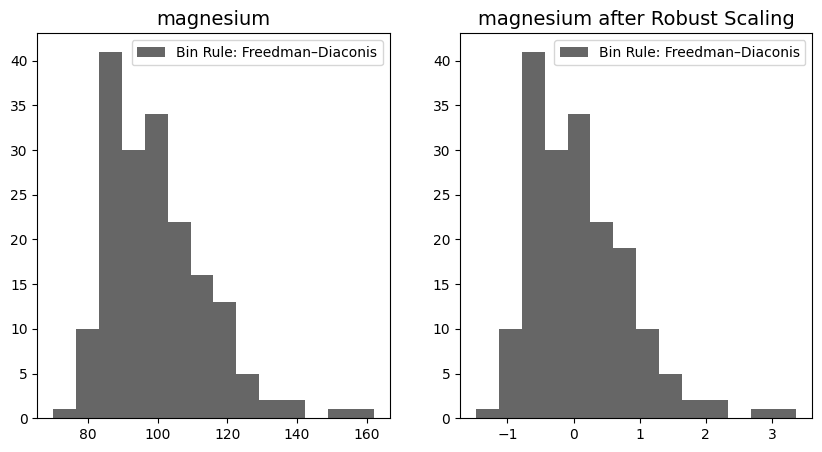

In [3]:
#@title <font color="#00dd00">**穩健縮放 Robust Scaling**</font>

#@markdown 穩健縮放係利用原始特徵的[四分位數](https://en.wikipedia.org/wiki/Quartile)來轉換特徵，
#@markdown 若特徵存有異常值(或離群值)，穩健縮放因考量特徵數據的分布，能降低異常值(或離群值)的影響。

#@markdown 穩健縮放的轉換公式 :
#@markdown $$\displaystyle x^{\prime} = \frac{x-\text{Median}}{ Q_{3}-Q_{1} }$$
#@markdown </br>
#@markdown 其中，$Q_{1}$ 為特徵欄位的第一四分位數，$Q_{3}$ 為特徵欄位的第三四分位數。

#@markdown 下圖係以紅酒資料集為例，對於 'magnesium'(鎂) 欄位進行穩健縮放後，與原始分布的對比，
#@markdown 從下圖的觀察可知，轉換前後的分布略微不同。

# 穩健縮放 'magnesium' 欄位
robust_scaled_magnesium_ = RobustScaler().fit_transform(magnesium_.values.reshape(-1, 1)).ravel()

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(x=magnesium_, bins='fd', fc='black', alpha=0.6, label='Bin Rule: Freedman–Diaconis')
plt.legend(loc='upper right')
plt.title('magnesium', fontsize=14)

plt.subplot(122)
plt.hist(x=robust_scaled_magnesium_, bins='fd', fc='black', alpha=0.6, label='Bin Rule: Freedman–Diaconis')
plt.legend(loc='upper right')
plt.title('magnesium after Robust Scaling', fontsize=14)

img_path = os.path.join(os.getcwd(), 'Histogram_about_Robust_Scaling.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

In [4]:
#@title 上述三種縮放方法的結果比較

#@markdown 針對紅酒資料集中 'magnesium'(鎂) 特徵欄位，經由上述三種縮放方法轉換後，縮放後特徵的統計量如下 :

summary = pd.DataFrame()
summary['magnesium'] = magnesium_.describe()
summary['Standardization'] = pd.Series(scaled_magnesium_).describe()
summary['Min-Max'] = pd.Series(mm_scaled_magnesium_).describe()
summary['Robust'] = pd.Series(robust_scaled_magnesium_).describe()
summary

,magnesium,Standardization,Min-Max,Robust
count,178.000000,1.780000e+02,178.000000,178.000000
mean,99.741573,-3.991813e-17,0.323278,0.091662
std,14.282484,1.002821e+00,0.155244,0.751710
min,70.000000,-2.088255e+00,0.000000,-1.473684
25%,88.000000,-8.244151e-01,0.195652,-0.526316
50%,98.000000,-1.222817e-01,0.304348,0.000000
75%,107.000000,5.096384e-01,0.402174,0.473684
max,162.000000,4.371372e+00,1.000000,3.368421


# 特徵縮放的必要性

在下列機器學習的情況中，特徵縮放通常係必要的資料前處理過程：

- **訓練基於距離的演算法**：
  - 對於基於距離的演算法，例如 : K 近鄰(K-Nearest Neighbors, KNN)、支援向量機(Support Vector Machines, SVM)等，若有一特徵 $X_1$ 的數值範圍，遠大於其他特徵的數值範圍，則，在計算距離的大小時，主要將取決於特徵 $X_1$ 的維度來決定，易導致模型無法從其他的特徵中學習到數據的關聯。  
  以紅酒資料集為例，訓練一個 KNN 分類模型，當對訓練特徵沒有進行任何特徵縮放，觀察 KNN 的決策邊界，如下圖，其決策邊界的劃分係依據數據尺度較大的特徵為主:    
<p align="left">
<img width="400" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Feature_Scaling/imgs/Decision_Boundary_of_KNN_without_Standardization.png">

   另一方面，當特徵有進行標準化時，則， KNN 的決策邊界劃分，不會受特徵間數值範圍的差異所影響。
<p align="left">
<img width="400" src="https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Feature_Scaling/imgs/Decision_Boundary_of_KNN_with_Standardization.png">
</p>

- **訓練基於梯度優化的演算法**：  
  - 對於基於梯度優化的演算法，例如 : 梯度下降(Gradient Descent)、類神經網路(Neural Network, NN)等，若特徵的數值範圍彼此差距很大，則，易造成需要較長時間來收斂梯度下降的過程。  

- **使用主成份分析(Principal Component Analysis, PCA)進行特徵降維** :  
  - PCA 主要係藉由線性代數中的奇異值分解(Singular Value Decomposition, SVD)，透過尋找特定的投影向量，使訓練資料集的特徵投影在此向量後，具有最大的變異量，從資料科學的觀點，SVD 是將一具有 n 個特徵的資料集，轉換成只有 k(<n) 個特徵的資料集。  
  值得注意，在資料集進行 PCA 降維前，會先透過標準化，將每個特徵欄位轉換成符合標準常態分配，目的除簡化理論的推導過程，不影響後續 SVD 尋找新的特徵向量方向之外，透過將資料轉換成無量綱(Dimensionless)的純量，能避免資料中不同單位尺度的特徵差異，並在相同的基準下進行比較分析。

# Python 範例程式碼

## 匯入套件

In [5]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

print('Python version:', sys.version[0:7])
print('NumPy version:', np.__version__ )
print('Pandas version:', pd.__version__ )
print('Matplotlib version:', matplotlib.__version__ )
print('Seaborn version:', sns.__version__)
print('Scikit-Learn version:', sklearn.__version__)

Python version: 3.10.12
NumPy version: 1.25.2
Pandas version: 1.5.3
Matplotlib version: 3.7.1
Seaborn version: 0.13.1
Scikit-Learn version: 1.2.2


## 紅酒資料集

### 下載資料集

In [6]:
# 下載紅酒資料集
wine = datasets.load_wine()

# 轉換資料集的型態成 DataFrame
wine_df = pd.DataFrame(wine['data'])
wine_df.columns = wine['feature_names']
wine_df['Classes']= wine['target']

print('資料集的前五筆: ')
wine_df.head()

資料集的前五筆: 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
print('數值型欄位的統計量: ')
wine_df.describe()

數值型欄位的統計量: 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Classes
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### 分層抽樣成訓練集與測試集

In [8]:
X = wine_df[['alcohol', 'proline']]
y = wine_df['Classes']
wine_class = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=99)

## 隨機梯度下降 Stochastic Gradient Descent  

當特徵間的數值範圍有很大差異時，特徵縮放對於訓練 SGD 模型的影響 : **特徵縮放能提升 SGD 模型的訓練效率**。

### 訓練 SGD 模型(資料無標準化)

In [9]:
# 無資料標準化 -> 模型訓練
pipe = Pipeline([('SGD', SGDClassifier(early_stopping=True, n_iter_no_change=10, random_state=40))])
pipe.fit(X_train, y_train)
sgd = pipe.named_steps['SGD']
print('The actual number of iterations =', sgd.n_iter_)

The actual number of iterations = 20


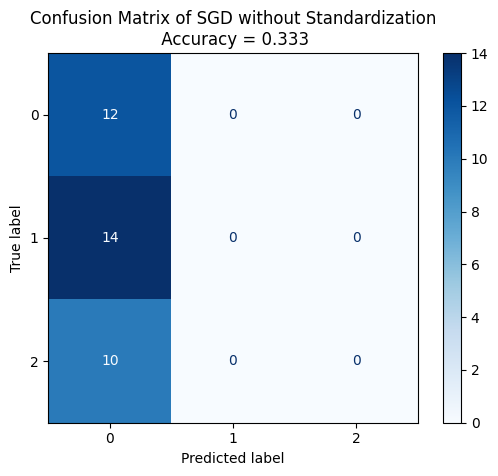

In [10]:
# 測試集中的驗證結果
preds_test = sgd.predict(X_test.values)
accuracy = pipe.score(X_test, y_test)

# 計算混淆矩陣
cm = confusion_matrix(y_test, preds_test,
                      labels=sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd.classes_)

# 混淆矩陣視覺化
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SGD without Standardization\n Accuracy = '+str(np.round(accuracy, 3)))

img_path = os.path.join(os.getcwd(), 'Confusion_Matrix_of_SGD_without_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

### 訓練 SGD 模型(資料有標準化)

In [11]:
# 資料標準化 -> 模型訓練
pipe_with_standardization = Pipeline([('scaler', StandardScaler()),
                                      ('SGD', SGDClassifier(early_stopping=True, n_iter_no_change=10,
                                                            random_state=40))])
pipe_with_standardization.fit(X_train.values, y_train.values)
sgd_with_standardization = pipe_with_standardization.named_steps['SGD']
print('The actual number of iterations =', sgd_with_standardization.n_iter_)

The actual number of iterations = 16


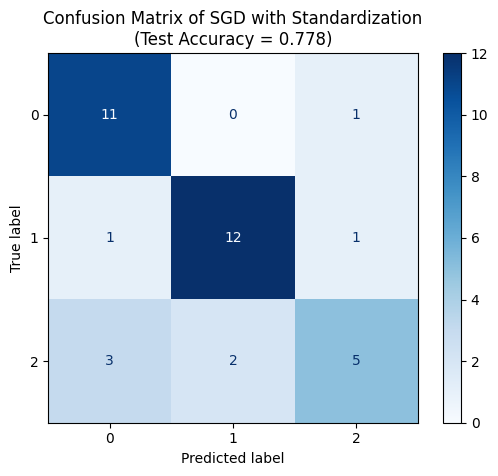

In [12]:
# 測試集中的驗證結果
preds_test = pipe_with_standardization.predict(X_test.values)
accuracy = pipe_with_standardization.score(X_test, y_test)

# 計算混淆矩陣
cm_with_standardization = confusion_matrix(y_test, preds_test,
                                          labels=sgd_with_standardization.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_with_standardization,
                              display_labels=sgd_with_standardization.classes_)

# 混淆矩陣視覺化
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SGD with Standardization\n(Test Accuracy = '+str(np.round(accuracy, 3))+')')

img_path = os.path.join(os.getcwd(), 'Confusion_Matrix_of_SGD_with_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## K 近鄰分類 K-nearest Neighbors Classifier


### 超參數 `n_neighbors` 對決策邊界的影響

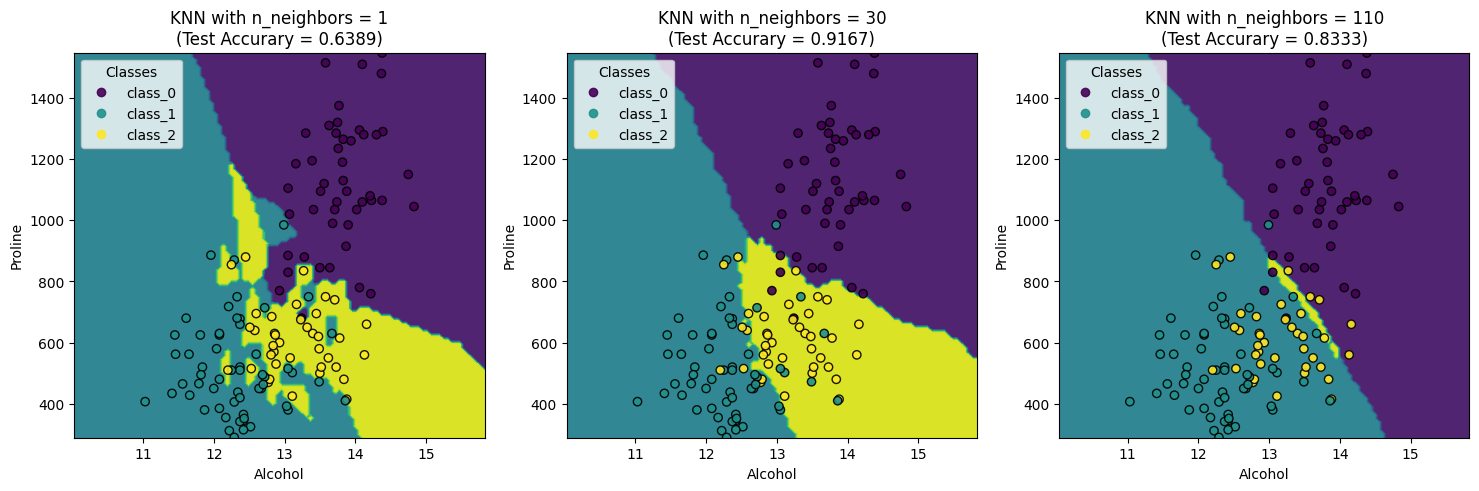

In [13]:
clf = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

# KNN 的決策邊界
_, axs = plt.subplots(ncols=3, figsize=(18, 5))

for ax, k in zip(axs, (1, 30, 110)):
    clf.set_params(KNN__n_neighbors=k).fit(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method='predict',
        shading='auto',
        alpha=0.95,
        xlabel='Alcohol',
        ylabel='Proline',
        ax=ax)

    scatter = disp.ax_.scatter(X_train.loc[:, 'alcohol'], X_train.loc[:, 'proline'], c=y_train,
                               alpha=0.9, edgecolors='k')
    disp.ax_.legend(scatter.legend_elements()[0], wine_class, loc='upper left', title='Classes')
    _ = disp.ax_.set_title(f'KNN with n_neighbors = {clf[-1].n_neighbors}\n(Test Accurary = {np.round(score_test, 4)})')

img_path = os.path.join(os.getcwd(), 'Comparing_KNN_with_different_n_neighbors.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

### 特徵縮放對決策邊界的影響

#### 訓練 KNN 模型(資料有標準化)

In [14]:
# 資料標準化 -> 模型訓練
pipe_with_standardization = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=10))])
pipe_with_standardization.fit(X_train.values, y_train.values)
knn_with_standardization = pipe_with_standardization.named_steps['KNN']

測試集中的驗證結果 :

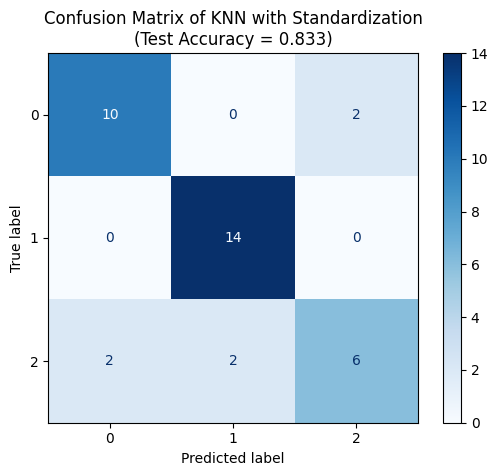

In [15]:
# 測試集中的驗證結果
preds_test = pipe_with_standardization.predict(X_test.values)
accuracy = pipe_with_standardization.score(X_test, y_test)

# 計算混淆矩陣
cm_with_standardization = confusion_matrix(y_test, preds_test,
                                           labels=knn_with_standardization.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_with_standardization,
                              display_labels=knn_with_standardization.classes_)

# 混淆矩陣視覺化
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of KNN with Standardization\n(Test Accuracy = '+str(np.round(accuracy, 3))+')')

img_path = os.path.join(os.getcwd(), 'Confusion_Matrix_of_KNN_with_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

KNN 的決策邊界視覺化 :

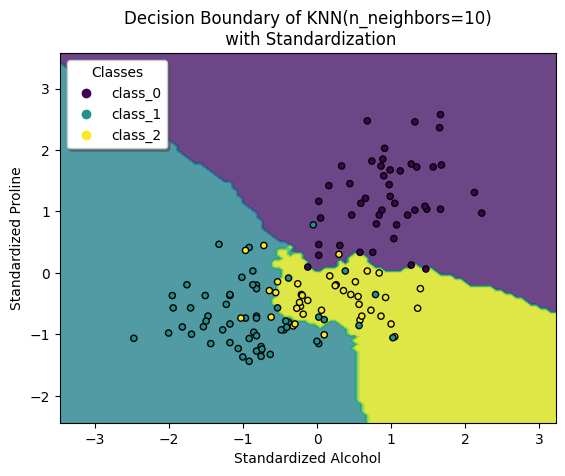

In [16]:
# 特徵欄位標準化
scaled_X_train = pd.DataFrame(columns=['alcohol', 'proline'])
scaled_X_test = pd.DataFrame(columns=['alcohol', 'proline'])

for col in X_train.columns:
    scaled_col = StandardScaler().fit_transform(X_train[col].values.reshape(-1, 1))
    scaled_X_train[col] = scaled_col.ravel()

for col in X_test.columns:
    scaled_col = StandardScaler().fit_transform(X_test[col].values.reshape(-1, 1))
    scaled_X_test[col] = scaled_col.ravel()

# KNN 決策邊界視覺化
disp = DecisionBoundaryDisplay.from_estimator(
        knn_with_standardization,
        scaled_X_train,
        response_method ='predict',
        alpha = 0.8,
        xlabel='Standardized Alcohol',
        ylabel='Standardized Proline')

scatter = disp.ax_.scatter(scaled_X_train.loc[:, 'alcohol'], scaled_X_train.loc[:, 'proline'], c=y_train,
                           s=20, edgecolors='k')
disp.ax_.legend(scatter.legend_elements()[0], wine_class, shadow=True, loc='upper left', title='Classes')
disp.ax_.set_title('Decision Boundary of KNN(n_neighbors=10)\n with Standardization')

img_path = os.path.join(os.getcwd(), 'Decision_Boundary_of_KNN_with_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

#### 訓練 KNN 模型(資料無標準化)

In [17]:
# 無資料標準化 -> 模型訓練
pipe = Pipeline([('KNN', KNeighborsClassifier(n_neighbors=10))])
pipe.fit(X_train, y_train)
knn = pipe.named_steps['KNN']

測試集中的驗證結果 :

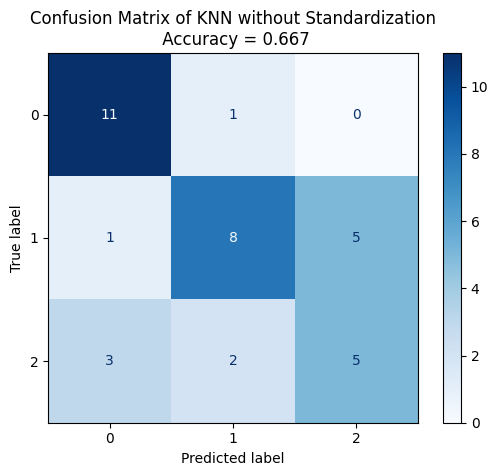

In [18]:
# 測試集中的驗證結果
preds_test = knn.predict(X_test.values)
accuracy = pipe.score(X_test, y_test)

# 計算混淆矩陣
cm = confusion_matrix(y_test, preds_test,
                      labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)

# 混淆矩陣視覺化
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of KNN without Standardization\n Accuracy = '+str(np.round(accuracy, 3)))

img_path = os.path.join(os.getcwd(), 'Confusion_Matrix_of_KNN_without_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

測試集的預測結果與 KNN 的決策邊界視覺化 :

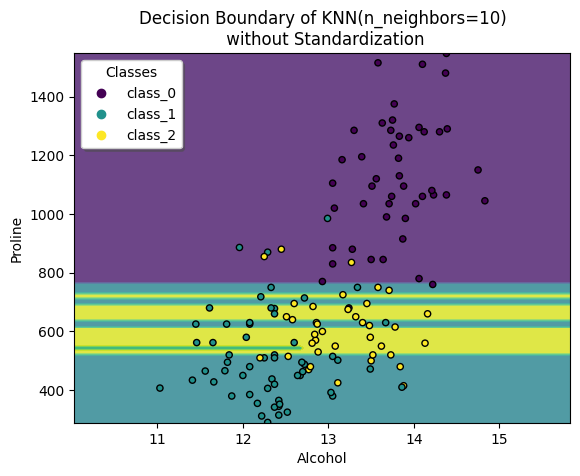

In [19]:
# KNN 決策邊界視覺化
disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X_train,
        response_method='predict',
        alpha=0.8,
        xlabel='Alcohol',
        ylabel='Proline')

scatter = disp.ax_.scatter(X_train.loc[:, 'alcohol'], X_train.loc[:, 'proline'], c=y_train,
                           s=20, edgecolors='k')
disp.ax_.legend(scatter.legend_elements()[0], wine_class, shadow=True, loc='upper left', title='Classes')
disp.ax_.set_title('Decision Boundary of KNN(n_neighbors=10)\n without Standardization')

img_path = os.path.join(os.getcwd(), 'Decision_Boundary_of_KNN_without_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## 支援向量分類 Support Vector Classifier

### 特徵縮放對決策邊界的影響

#### 訓練 SVC 模型(資料有標準化)

In [20]:
# 資料標準化 -> 模型訓練
pipe_with_standardization = Pipeline([('scaler', StandardScaler()), ('SVC', SVC(kernel='rbf', C=1.5))])
pipe_with_standardization.fit(X_train.values, y_train.values)
svc_with_standardization = pipe_with_standardization.named_steps['SVC']

測試集中的驗證結果 :

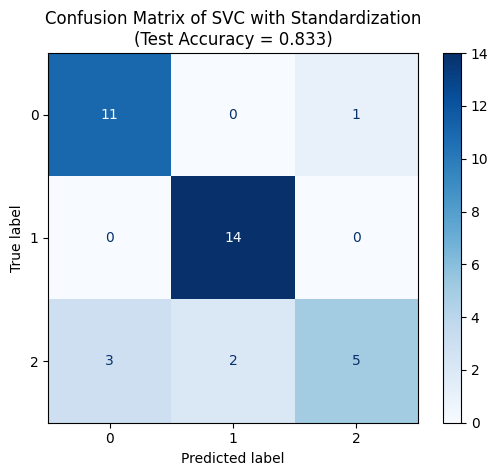

In [21]:
# 測試集中的驗證結果
preds_test = pipe_with_standardization.predict(X_test.values)
accuracy = pipe_with_standardization.score(X_test, y_test)

# 計算混淆矩陣
cm_of_svc_with_standardization = confusion_matrix(y_test, preds_test,
                                                  labels=svc_with_standardization.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_of_svc_with_standardization,
                              display_labels=svc_with_standardization.classes_)

# 混淆矩陣視覺化
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVC with Standardization\n(Test Accuracy = '+str(np.round(accuracy, 3))+')')

img_path = os.path.join(os.getcwd(), 'Confusion_Matrix_of_SVC_with_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

SVC 的決策邊界視覺化 :

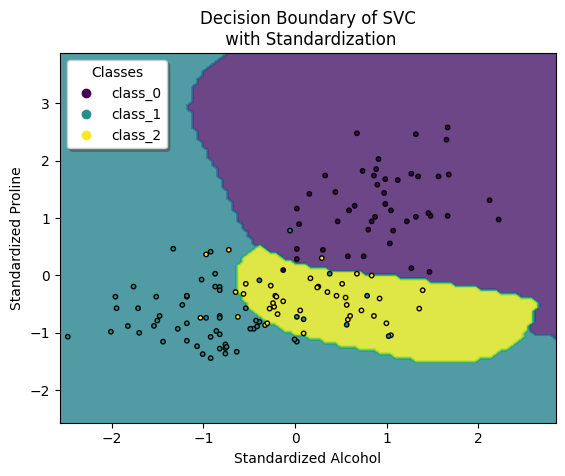

In [22]:
# 特徵欄位標準化
scaled_X_train = pd.DataFrame(columns=['alcohol', 'proline'])
scaled_X_test = pd.DataFrame(columns=['alcohol', 'proline'])

for col in X_train.columns:
    scaled_col = StandardScaler().fit_transform(X_train[col].values.reshape(-1, 1))
    scaled_X_train[col] = scaled_col.ravel()

for col in X_test.columns:
    scaled_col = StandardScaler().fit_transform(X_test[col].values.reshape(-1, 1))
    scaled_X_test[col] = scaled_col.ravel()

# SVC 決策邊界視覺化
disp = DecisionBoundaryDisplay.from_estimator(
        svc_with_standardization,
        scaled_X_test,
        response_method='predict',
        alpha=0.8,
        xlabel='Standardized Alcohol',
        ylabel='Standardized Proline')

scatter = disp.ax_.scatter(scaled_X_train.loc[:, 'alcohol'], scaled_X_train.loc[:, 'proline'], c=y_train,
                           s=10, edgecolors='k')
disp.ax_.legend(scatter.legend_elements()[0], wine_class, shadow=True, loc='upper left', title='Classes')
disp.ax_.set_title('Decision Boundary of SVC\n with Standardization')

img_path = os.path.join(os.getcwd(), 'Decision_Boundary_of_SVC_with_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

#### 訓練 SVC 模型(資料無標準化)

In [23]:
# 無資料標準化 -> 模型訓練
pipe = Pipeline([('SVC', SVC(kernel='rbf', C=1.5))])
pipe.fit(X_train, y_train)
svc = pipe.named_steps['SVC']

測試集中的驗證結果 :

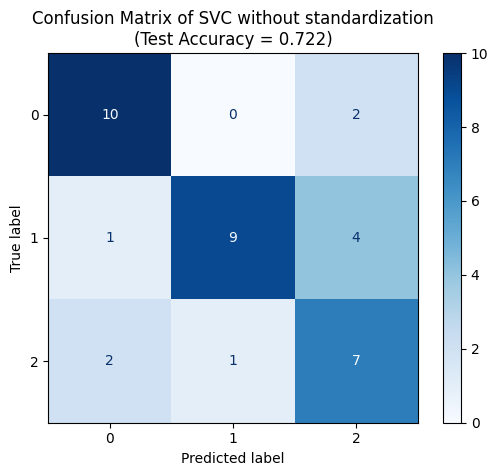

In [24]:
# 測試集中的驗證結果
preds_test = svc.predict(X_test)
accuracy = pipe.score(X_test, y_test)

# 計算混淆矩陣
cm = confusion_matrix(y_test, preds_test,  labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)

# 混淆矩陣視覺化
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVC without standardization\n(Test Accuracy = '+str(np.round(accuracy, 3))+')')

img_path = os.path.join(os.getcwd(), 'Confusion_Matrix_of_SVC_without_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

SVC 的決策邊界視覺化 :

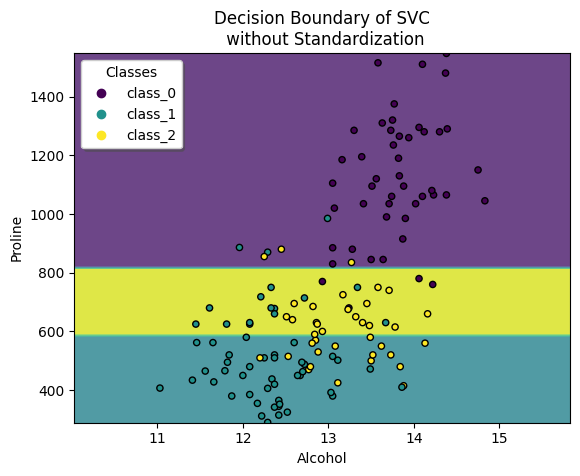

In [25]:
# SVC 決策邊界視覺化
disp = DecisionBoundaryDisplay.from_estimator(
        svc,
        X_train,
        response_method='predict',
        alpha=0.8,
        xlabel='Alcohol',
        ylabel='Proline')

scatter = disp.ax_.scatter(X_train.loc[:, 'alcohol'], X_train.loc[:, 'proline'], c=y_train,
                           s=20, edgecolors='k')
disp.ax_.legend(scatter.legend_elements()[0], wine_class, shadow=True, loc='upper left', title='Classes')
disp.ax_.set_title('Decision Boundary of SVC\n without Standardization')

img_path = os.path.join(os.getcwd(), 'Decision_Boundary_of_SVC_without_Standardization.png')
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()